In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

In [ ]:
df_train.drop(['PassengerId'], axis=1, inplace=True)
df_test.drop(['PassengerId'], axis=1, inplace=True)
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
cls = df_train.columns
df_train.head()

In [ ]:
# Create a pair plot to visualize relationships between different features and species.
ax = sns.pairplot(df_train, hue='Survived', markers=["o", "s"])
plt.suptitle("Pair Plot of Titanic Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

In [ ]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(12, 6))
for i, feature in enumerate(cls[:-1]):
    plt.subplot(len(cls)//2, 2, i + 1)
    sns.histplot(data=df_train, x=feature, hue='Survived', kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df_train.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# One-hot encode the categorical features.
df_cleaned = pd.get_dummies(df_train, columns=["Sex", "Embarked"]).dropna()
X = df_cleaned.drop(['Survived'], axis=1)
y = df_cleaned['Survived']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [ ]:
# Plot the first two principal components.
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.colorbar(label='Survived')
plt.show()

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf_svm.predict(X_val_scaled)

conf_disp = ConfusionMatrixDisplay.from_estimator(clf_svm, X_val_scaled, y_val,
                                                  display_labels=["Died", "Survived"])

In [ ]:
clf_svm_pca = SVC()
clf_svm_pca.fit(principalComponents[:, :2], y_train)

In [ ]:
princ_comp_val = pca.transform(X_val_scaled)
conf_disp = ConfusionMatrixDisplay.from_estimator(clf_svm_pca, princ_comp_val[:, :2], y_val,
                                                  display_labels=["Died", "Survived"])

In [ ]:
# Create a meshgrid of points covering the feature space
x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the meshgrid
Z = clf_svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the meshgrid and decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary')
plt.show()

## Feature Engineering

In [44]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
# Feature engineering
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if type(big_string) == str:
            if substring in big_string:
                return substring
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

df['Title'] = df['Name'].map(lambda x: substrings_in_string(x, title_list))

In [47]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
df['Title']=df.apply(replace_titles, axis=1)

In [ ]:
df["Cabin"].unique()

In [48]:
#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'NaN']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
df['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df.head()

In [49]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df.head()

In [50]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [51]:
X = pd.get_dummies(X, columns=["Sex", "Embarked", "Title", "Deck"])
X.fillna(0, inplace=True)

In [ ]:
X.head()

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [ ]:
# Create a meshgrid of points covering the feature space
x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot the meshgrid and decision boundary
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary')
plt.show()

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

In [ ]:
conf_disp = ConfusionMatrixDisplay.from_estimator(svm, X_val, y_val, display_labels=["Died", "Survived"])

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param = [
    {"C": [0.5, 1, 10, 100, 1000, 10000],  # Regularization
     "gamma": ["scale", 1, 0.1, 0.001, 0.0001],
     "kernel": ["rbf"]},
]

optimal_params = GridSearchCV(
    SVC(),
    param,
    cv=5,
    scoring="accuracy",
    verbose=2
)
optimal_params.fit(X_scaled, y)
print(optimal_params.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.

In [56]:
svm = SVC(C=1000, gamma=0.001, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

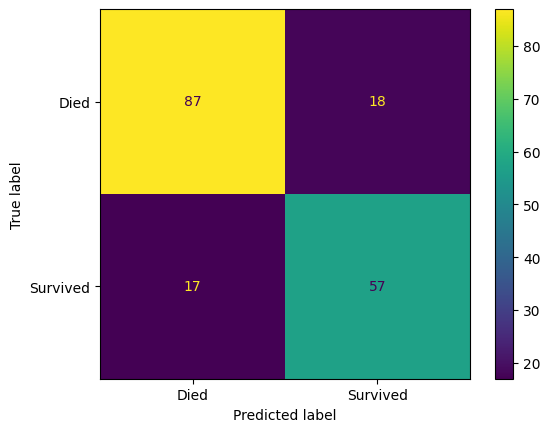

In [57]:
conf_disp = ConfusionMatrixDisplay.from_estimator(svm, X_val, y_val, display_labels=["Died", "Survived"])

## Neural Nets

In [58]:
import torch
import torch.nn as nn

In [59]:
class TitanicNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TitanicNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return self.sigmoid(x)

In [60]:
print(X_train.shape, type(X_val))
print(y_val.shape, type(y_train))

(712, 22) <class 'numpy.ndarray'>
(179,) <class 'pandas.core.series.Series'>


In [61]:
train = torch.utils.data.TensorDataset(torch.Tensor(X_train), torch.Tensor(np.array(y_train)))
val = torch.utils.data.TensorDataset(torch.Tensor(X_val), torch.Tensor(np.array(y_val)))

n_epochs = 1000
batch_size = 16
learning_rate = 0.00005
input_size = X_train.shape[1]
hidden_size = 32
num_classes = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(dataset=val, batch_size=batch_size, shuffle=False)

model = TitanicNN(input_size, hidden_size, num_classes).to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
min_val_loss = np.inf
best_model = None

for epoch in range(n_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)[..., None]

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    y = model(torch.Tensor(X_val).to(device)).cpu().detach().numpy()
    loss_val = criterion(torch.Tensor(y), torch.Tensor(np.array(y_val))[..., None])

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
        print(f'Epoch [{epoch+1}/{n_epochs}], Validation Loss: {loss_val.item():.4f}')
    if loss_val < min_val_loss:
        min_val_loss = loss_val
        best_model = model

Epoch [5/1000], Loss: 0.6830
Epoch [5/1000], Validation Loss: 0.6848
Epoch [10/1000], Loss: 0.6576
Epoch [10/1000], Validation Loss: 0.6672
Epoch [15/1000], Loss: 0.6593
Epoch [15/1000], Validation Loss: 0.6378
Epoch [20/1000], Loss: 0.5559
Epoch [20/1000], Validation Loss: 0.5929
Epoch [25/1000], Loss: 0.5806
Epoch [25/1000], Validation Loss: 0.5401
Epoch [30/1000], Loss: 0.4783
Epoch [30/1000], Validation Loss: 0.4998
Epoch [35/1000], Loss: 0.4781
Epoch [35/1000], Validation Loss: 0.4768
Epoch [40/1000], Loss: 0.4625
Epoch [40/1000], Validation Loss: 0.4649
Epoch [45/1000], Loss: 0.2630
Epoch [45/1000], Validation Loss: 0.4574
Epoch [50/1000], Loss: 0.2890
Epoch [50/1000], Validation Loss: 0.4519
Epoch [55/1000], Loss: 0.3984
Epoch [55/1000], Validation Loss: 0.4474
Epoch [60/1000], Loss: 0.4362
Epoch [60/1000], Validation Loss: 0.4432
Epoch [65/1000], Loss: 0.4089
Epoch [65/1000], Validation Loss: 0.4397
Epoch [70/1000], Loss: 0.4813
Epoch [70/1000], Validation Loss: 0.4362
Epoch [7

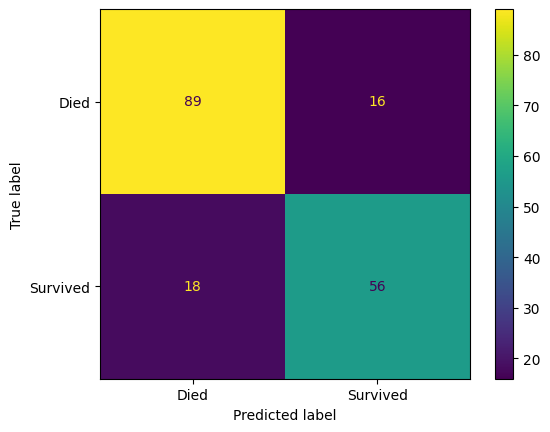

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = best_model(torch.Tensor(X_val).to(device)).cpu().detach().numpy()
y_pred_round = np.round(y_pred)

conf_disp = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_round, display_labels=["Died", "Survived"])


In [64]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
df_test['Title'] = df_test['Name'].map(lambda x: substrings_in_string(x, title_list))
df_test['Title'] = df_test.apply(replace_titles, axis=1)
df_test['Deck'] = df_test['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
df_test.drop(['Name', 'Ticket', 'Cabin', "PassengerId"], axis=1, inplace=True)
df_test = pd.get_dummies(df_test, columns=["Sex", "Embarked", "Title", "Deck"])

In [73]:
df_test.fillna(0, inplace=True)
df_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'],
      dtype='object')

In [71]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'],
      dtype='object')

In [74]:
df_test["Deck_T"] = False

In [75]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(df_test)

In [76]:
y_pred_svm = svm.predict(X_test_scaled)
y_pred_nn = best_model(torch.Tensor(X_test_scaled).to(device)).cpu().detach().numpy()

In [80]:
# Save the predictions to a CSV file
df_test = pd.read_csv('test.csv')
df_test['Survived'] = y_pred_svm
df_test[['PassengerId', 'Survived']].to_csv('svm_predictions.csv', index=False)

df_test['Survived'] = np.round(y_pred_nn).astype(int)
df_test[['PassengerId', 'Survived']].to_csv('nn_predictions.csv', index=False)